In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("/workspaces/climateRiskProject/WEEK1/historical_weather_data.csv") 

# finding shape...
print(df.shape)

# basic idea of what datatypes and non null attributes
print(df.info())

#description
print(df.describe())

# First 5 rows
print(df.head())

(1095, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1095 non-null   object 
 1   Station           1095 non-null   object 
 2   Temperature       1095 non-null   float64
 3   Precipitation     1095 non-null   float64
 4   Humidity          1095 non-null   float64
 5   WindSpeed         1095 non-null   float64
 6   WeatherCondition  1095 non-null   object 
dtypes: float64(4), object(3)
memory usage: 60.0+ KB
None
       Temperature  Precipitation     Humidity    WindSpeed
count  1095.000000    1095.000000  1095.000000  1095.000000
mean     12.378222       1.704898    65.686983     9.826464
std      12.999715       2.882439    20.053421     5.864450
min      -9.917431       0.000000    30.080449     0.002290
25%       1.011684       0.000000    48.814778     4.928115
50%      11.848181       0.000000    65.515

In [24]:
# Check for missing values
print(df.isnull().sum())

print(df.Temperature.min())
#the minimum temperature is -9.91743116251698

print(df.Temperature.max())
# the maximum temperature is 34.80196798453765



Date                0
Station             0
Temperature         0
Precipitation       0
Humidity            0
WindSpeed           0
WeatherCondition    0
dtype: int64
-9.91743116251698
34.80196798453765


# Week 1 Project Conclusion:
 The dataset contains 1095 rows and 7 columns.  
 No major missing values were found / Missing values were identified and can be handled later.  
 The temperature ranges from -9 to 34  
 The dataset is now ready for further cleaning, preprocessing, and model building in upcoming weeks.


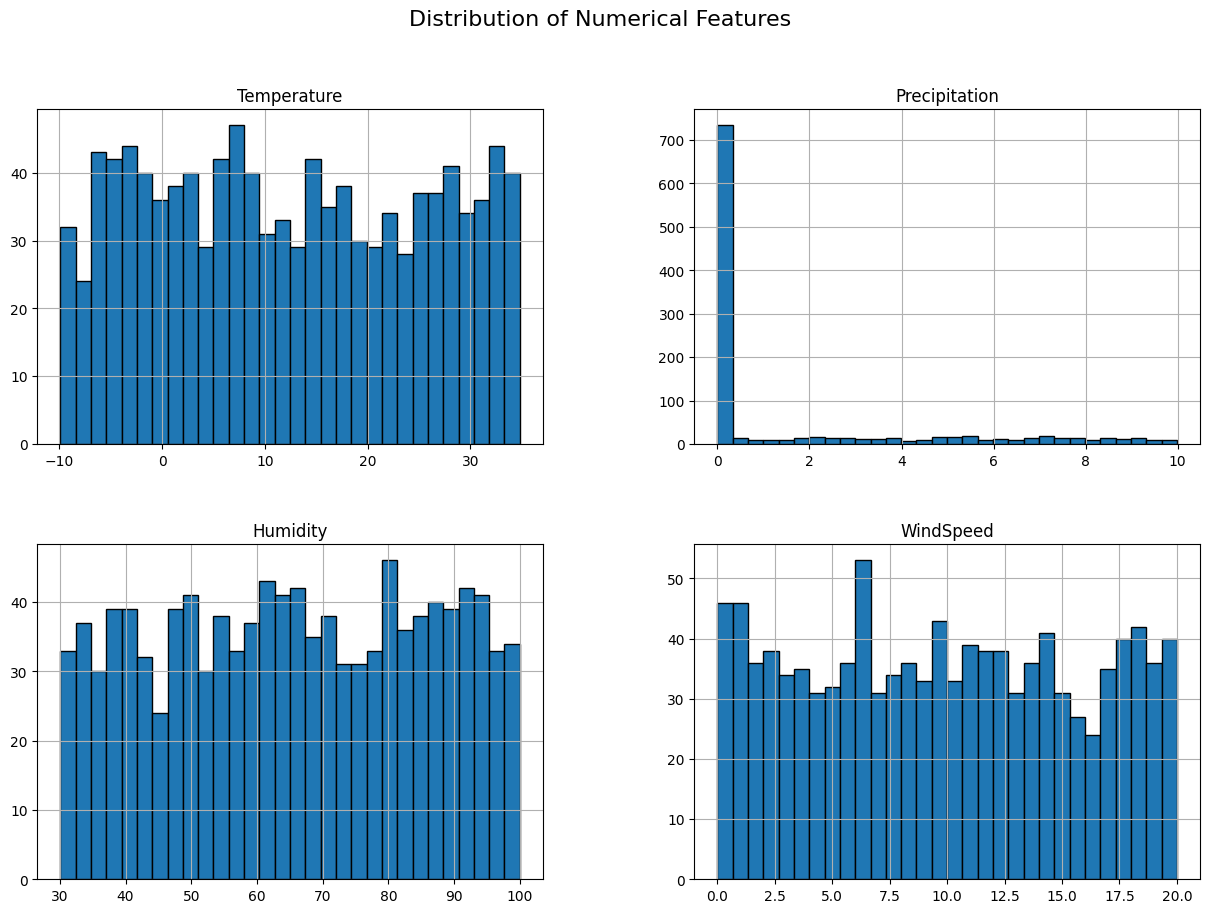

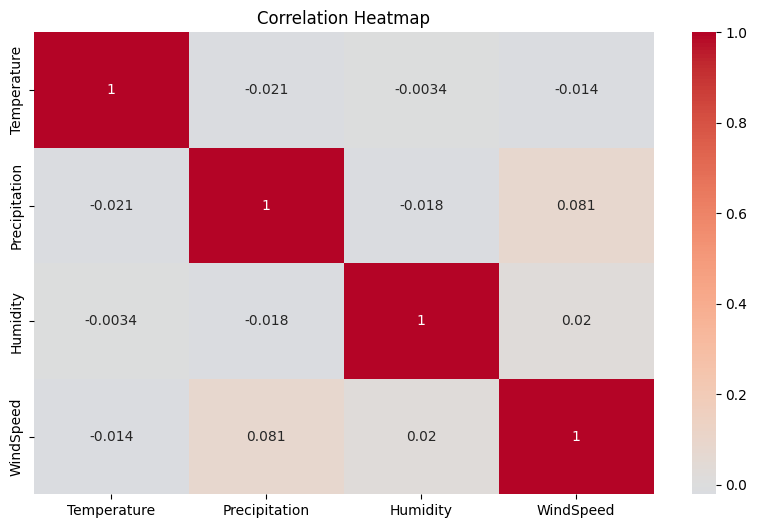

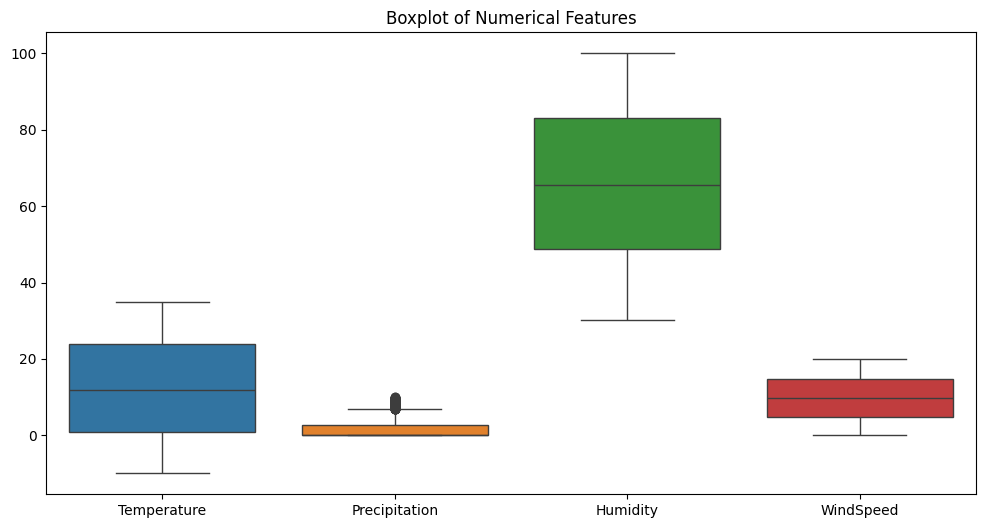

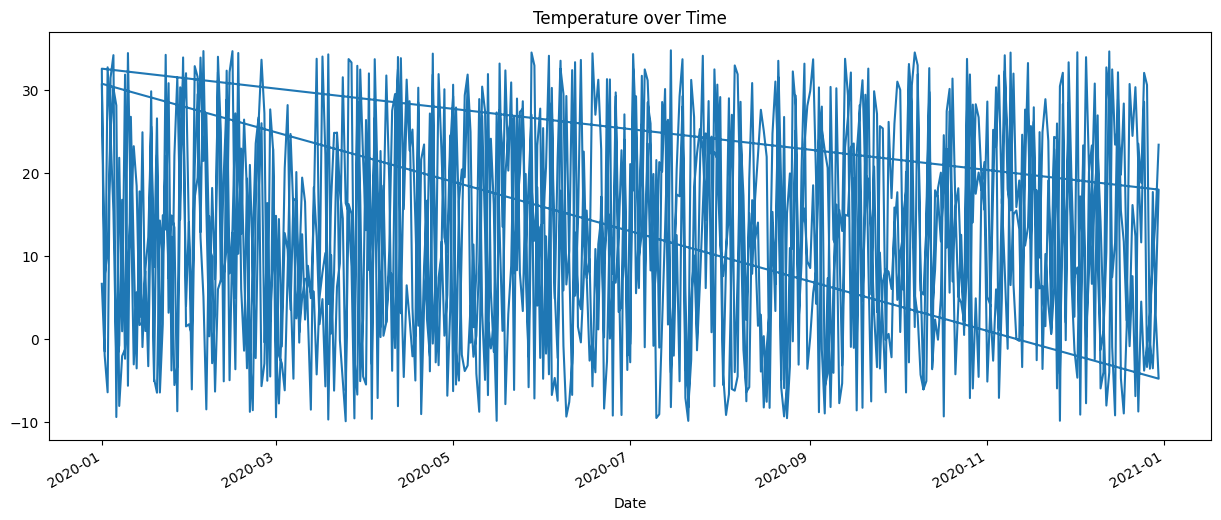

In [25]:
# --------------------------
# ----------WEEK 2----------
#  EDA
# --------------------------

# Distribution of numerical features
df.hist(figsize=(15,10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])  # only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=numeric_df)
plt.title("Boxplot of Numerical Features")
plt.show()

# Time series trend (if Date column exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Temperature'].plot(figsize=(15,6), title="Temperature over Time")
    plt.show()


In [26]:
# --------------------------
#  Data Transformation
# --------------------------

# Handling missing values (fill with median)
df = df.fillna(df.median(numeric_only=True))

# Outlier removal using IQR (on Temperature)
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Temperature'] < (Q1 - 1.5 * IQR)) | (df['Temperature'] > (Q3 + 1.5 * IQR)))]

# Normalize numeric columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_df.columns] = scaler.fit_transform(df[numeric_df.columns])

print("\nData after scaling:\n", df.head())



Data after scaling:
              Station  Temperature  Precipitation  Humidity  WindSpeed  \
Date                                                                    
2020-01-01  Station1     0.370549       0.000000  0.491275   0.478167   
2020-01-02  Station1     0.176345       0.299388  0.792710   0.325080   
2020-01-03  Station1     0.078022       0.000000  0.863724   0.174278   
2020-01-04  Station1     0.925523       0.000000  0.976675   0.864556   
2020-01-05  Station1     0.987006       0.000000  0.851323   0.640436   

           WeatherCondition  
Date                         
2020-01-01    Partly Cloudy  
2020-01-02           Cloudy  
2020-01-03             Snow  
2020-01-04    Partly Cloudy  
2020-01-05             Snow  


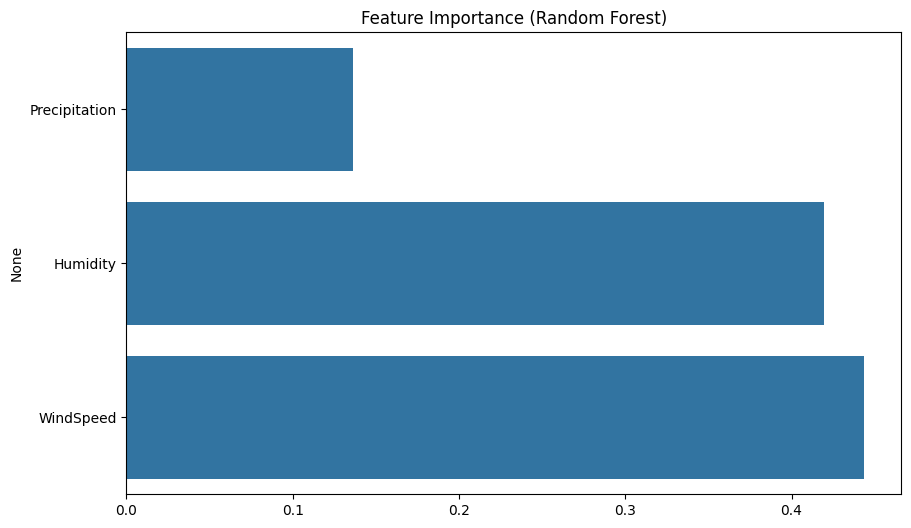

In [27]:
# --------------------------
#  Feature Selection
# --------------------------
from sklearn.ensemble import RandomForestRegressor

# Drop target leakage: ensure 'Temperature' is target
X = df.drop('Temperature', axis=1).select_dtypes(include=[np.number])  
y = df['Temperature']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


# Week 2 Conclusion:
 Correlation heatmap shows relationships between numeric variables.
 Outliers in Temperature handled using IQR method.
 Data normalized with MinMaxScaler for model readiness.
 Random Forest feature importance suggests which features best predict Temperature.
 Dataset is now ready for Week 3: feature engineering and model building.